In [1]:
import cv2
import random
import albumentations as A
import matplotlib.pyplot as plt

from albumentations.core.transforms_interface import ImageOnlyTransform

In [2]:
img_path = "/home/pervinco/upstage-cv-classification-cv7/dataset/train/0a4adccbb7fe73e0.jpg"
image = cv2.imread(img_path)

In [3]:
def quarter_divide(image):
    height, width, _ = image.shape
    center_x, center_y = width // 2, height // 2

    top_left = image[0:center_y, 0:center_x]
    top_right = image[0:center_y, center_x:width]
    bottom_left = image[center_y:height, 0:center_x]
    bottom_right = image[center_y:height, center_x:width]

    results = [top_left, top_right, bottom_left, bottom_right]
    
    return results[random.randint(0, 3)]

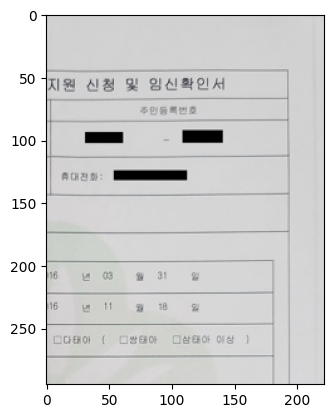

In [4]:
result = quarter_divide(image)
plt.imshow(result)

In [5]:
def half_divide(image):
    height, width, _ = image.shape    
    center_y = height // 2

    top_half = image[0:center_y, :]
    bottom_half = image[center_y:height, :]

    results = [top_half, bottom_half]
    idx = random.randint(0, 1)
    
    return results[idx]

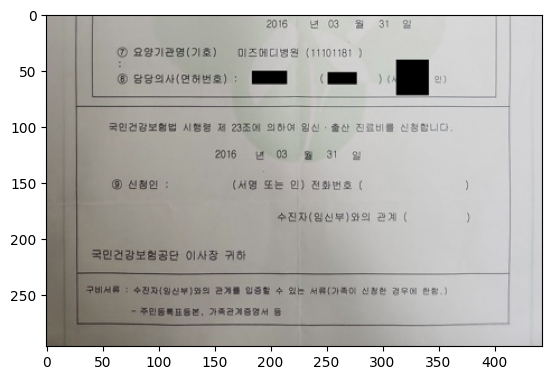

In [6]:
result = half_divide(image)
plt.imshow(result)

In [7]:
def divide_three_parts(image):
    height, width = image.shape[:2]

    part_height = height // 3
    top_part = image[:part_height, :]
    middle_part = image[part_height:2*part_height, :]
    bottom_part = image[2*part_height:, :]

    results = [top_part, middle_part, bottom_part]
    idx = random.randint(0, 2)

    return results[idx]

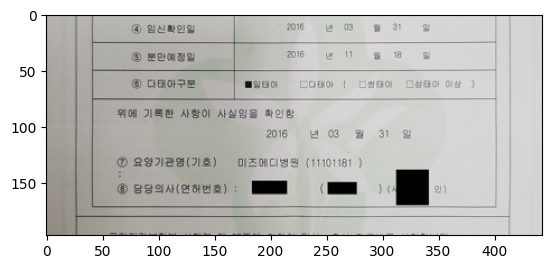

In [8]:
result = divide_three_parts(image)
plt.imshow(result)

In [9]:
def divide_six_parts(image):
    height, width = image.shape[:2]

    block_height = height // 2
    block_width = width // 3

    block_1 = image[:block_height, :block_width]
    block_2 = image[:block_height, block_width:2*block_width]
    block_3 = image[:block_height, 2*block_width:]
    block_4 = image[block_height:, :block_width]
    block_5 = image[block_height:, block_width:2*block_width]
    block_6 = image[block_height:, 2*block_width:]

    results = [block_1, block_2, block_3, block_4, block_5, block_6]
    idx = random.randint(0, 5)

    return results[idx]

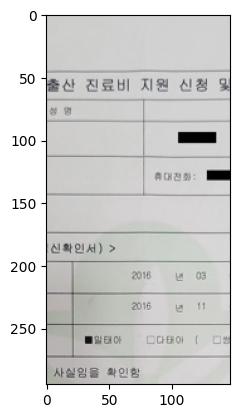

In [19]:
result = divide_six_parts(image)
plt.imshow(result)

In [11]:
class QuarterDivide(ImageOnlyTransform):
    def __init__(self, always_apply=False, p=1):
        super().__init__(always_apply=always_apply, p=p)
    
    def apply(self, img, **params):
        return quarter_divide(img)
    
class HalfDivide(ImageOnlyTransform):
    def __init__(self, always_apply=False, p=1):
        super().__init__(always_apply=always_apply, p=p)

    def apply(self, img, **params):
        return half_divide(img)
    
class DivideThreeParts(ImageOnlyTransform):
    def __init__(self, always_apply=False, p=1):
        super().__init__(always_apply=always_apply, p=p)

    def apply(self, img, **params):
        return divide_three_parts(img)
    
class DivideSixParts(ImageOnlyTransform):
    def __init__(self, always_apply=False, p=1):
        super().__init__(always_apply=always_apply, p=p)

    def apply(self, img, **params):
        return divide_six_parts(img)

In [13]:
img_h, img_w = 380, 380

values = [[0, 0, 0], [255, 255, 255]]
transform = A.Compose([
    A.Compose([
        A.LongestMaxSize(max_size=max(img_h, img_w), p=1),
        A.PadIfNeeded(min_height=img_h, min_width=img_w, border_mode=0, value=values[random.randint(0, 1)], p=1),

        A.OneOf([
            QuarterDivide(p=0.25),
            HalfDivide(p=0.25),
            DivideThreeParts(p=0.25),
            DivideSixParts(p=0.25)
        ], p=0.5),
    ], p=1),

    A.Affine(keep_ratio=True, 
             interpolation=0, 
             rotate=(-45, 45), 
             scale=(1.5, 2),
             p=1),

])

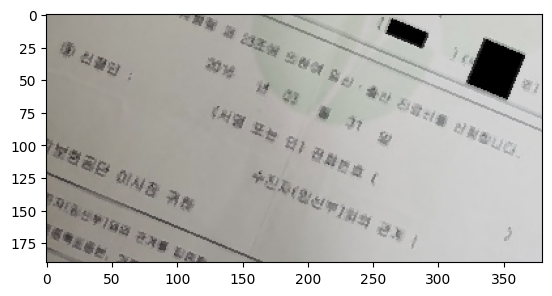

In [14]:
result = transform(image=image)['image']
plt.imshow(result)